In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from datetime import datetime

In [4]:
from knmy import knmy

## |Hourly Data

In [337]:
disclaimer, stations, variables, data = knmy.get_hourly_data(stations=[260], start=datetime(year=1970, month=1, day=1, hour=1), end=datetime(year=2020, month=12, day=31, hour=23),
                                                             inseason=True, variables=['WIND', 'TEMP'], parse=True)

/home/jorgos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  


In [338]:
variables

{0: Variable(Index=0, Abbreviation='YYYYMMDD', Description='datum (YYYY=jaar,MM=maand,DD=dag)'),
 1: Variable(Index=1, Abbreviation='HH', Description='tijd (HH=uur, UT.12 UT=13 MET, 14 MEZT. Uurvak 05 loopt van 04.00 UT tot 5.00 UT'),
 2: Variable(Index=2, Abbreviation='DD', Description='Windrichting (in graden) gemiddeld over de laatste 10 minuten van het afgelopen uur (360=noord, 90=oost, 180=zuid, 270=west, 0=windstil 990=veranderlijk. Zie http://www.knmi.nl/kennis-en-datacentrum/achtergrond/klimatologische-brochures-en-boeken'),
 3: Variable(Index=3, Abbreviation='FH', Description='Uurgemiddelde windsnelheid (in 0.1 m/s). Zie http://www.knmi.nl/kennis-en-datacentrum/achtergrond/klimatologische-brochures-en-boeken'),
 4: Variable(Index=4, Abbreviation='FF', Description='Windsnelheid (in 0.1 m/s) gemiddeld over de laatste 10 minuten van het afgelopen uur'),
 5: Variable(Index=5, Abbreviation='FX', Description='Hoogste windstoot (in 0.1 m/s) over het afgelopen uurvak'),
 6: Variable(I

In [339]:
data['HH'] = data['HH'].astype(str)

In [340]:
data['HH'] =data['HH'].replace([str(x) for x in range(2,25)],['01','02','03','04','05','06','07','08','09','10', '11', '12', '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23'])

In [341]:
data['YYYYMMDD HH']=data.agg('{0[YYYYMMDD]}  {0[HH]}'.format, axis=1)

In [342]:
data=data.drop([0])

In [343]:
data.loc[data['HH']==24]

,STN,YYYYMMDD,HH,DD,FH,FF,FX,T,T10N,TD,YYYYMMDD HH


In [344]:
data['HH'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23'], dtype=object)

In [345]:
data['YYYYMMDD HH']= data['YYYYMMDD HH'].apply(lambda x: datetime.strptime(x, '%Y%m%d %H'))

In [346]:
datetime.strptime('19700101 01', '%Y%m%d %H')

datetime.datetime(1970, 1, 1, 1, 0)

In [347]:
data1 =data.reindex(columns= ['YYYYMMDD HH',  'T', 'T10N', 'TD','FH', 'FF', 'FX'])
data1=data1.rename(columns={'YYYYMMDD HH':'Date'})

In [348]:
data1 = data1.set_index(['Date'])

In [349]:
data1['T'] =data1['T'].apply(pd.to_numeric)

In [350]:
data1.isna().sum()

T            0
T10N    355720
TD           0
FH           0
FF           0
FX         421
dtype: int64

In [351]:
sns.set(rc={'figure.figsize':(11,4)})

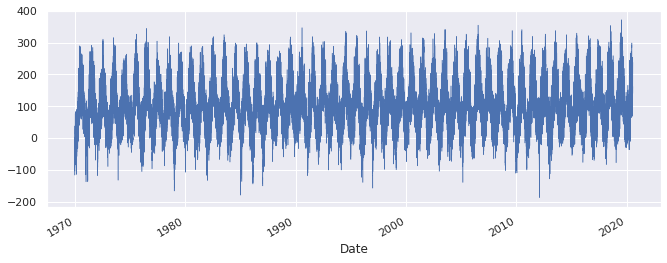

In [352]:
data1['T'].apply(pd.to_numeric).plot(linewidth=0.5)

In [353]:
data1.to_csv('DeBilt1970.csv')

In [354]:
data.loc[data['YYYYMMDD HH']=='1990-09-30 19:00:00']

,STN,YYYYMMDD,HH,DD,FH,FF,FX,T,T10N,TD,YYYYMMDD HH
174290,260,19900930,19,220,36,26,67,171,NaN,163,1990-09-30 19:00:00


In [355]:
data.shape

(424856, 11)

In [356]:
data1.shape

(424856, 6)

## Daily Data

In [14]:
a, b, c, d,e = knmy.get_daily_data(stations=[260],  start=datetime(year=1970, month=1, day=1, hour=1), end=datetime(year=2020, month=12, day=31, hour=23), variables=['WIND','TEMP', 'SQ'])

ValueError: too many values to unpack (expected 5)

In [10]:
data_daily

'# BRON: KONINKLIJK NEDERLANDS METEOROLOGISCH INSTITUUT (KNMI)\r\n# Opmerking: door stationsverplaatsingen en veranderingen in waarneemmethodieken zijn deze tijdreeksen van dagwaarden mogelijk inhomogeen! Dat betekent dat deze reeks van gemeten waarden niet geschikt is voor trendanalyse. Voor studies naar klimaatverandering verwijzen we naar de gehomogeniseerde reeks maandtemperaturen van De Bilt <http://www.knmi.nl/kennis-en-datacentrum/achtergrond/gehomogeniseerde-reeks-maandtemperaturen-de-bilt> of de Centraal Nederland Temperatuur <http://www.knmi.nl/kennis-en-datacentrum/achtergrond/centraal-nederland-temperatuur-cnt>.\r\n# \r\n# \r\n# STN      LON(east)   LAT(north)     ALT(m)  NAME\r\n# 260:         5.180       52.100       1.90  DE BILT\r\n# \r\n# YYYYMMDD = Date (YYYY=year MM=month DD=day); \r\n# DDVEC    = Vector mean wind direction in degrees (360=north, 90=east, 180=south, 270=west, 0=calm/variable); \r\n# FHVEC    = Vector mean windspeed (in 0.1 m/s); \r\n# FG       = Dail

In [15]:
knmy.get_hourly_data(stations=[260], start=datetime(year=1970, month=1, day=1, hour=1), end=datetime(year=2020, month=12, day=31, hour=23),
                                                             inseason=True, variables=['WIND', 'TEMP'], parse=True)

/home/jorgos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  


('BRON: KONINKLIJK NEDERLANDS METEOROLOGISCH INSTITUUT (KNMI)\nOpmerking: door stationsverplaatsingen en veranderingen in waarneemmethodieken zijn deze tijdreeksen van uurwaarden mogelijk inhomogeen! Dat betekent dat deze reeks van gemeten waarden niet geschikt is voor trendanalyse. Voor studies naar klimaatverandering verwijzen we naar de gehomogeniseerde reeks maandtemperaturen van De Bilt <http://www.knmi.nl/klimatologie/onderzoeksgegevens/homogeen_260/index.html> of de Centraal Nederland Temperatuur <http://www.knmi.nl/klimatologie/onderzoeksgegevens/CNT/>.',
            name  latitude  longitude  altitude
 number                                        
 260     DE BILT      52.1       5.18       1.9,
 {0: Variable(Index=0, Abbreviation='YYYYMMDD', Description='datum (YYYY=jaar,MM=maand,DD=dag)'),
  1: Variable(Index=1, Abbreviation='HH', Description='tijd (HH=uur, UT.12 UT=13 MET, 14 MEZT. Uurvak 05 loopt van 04.00 UT tot 5.00 UT'),
  2: Variable(Index=2, Abbreviation='DD', Descri